In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
!head -5 ex1data1.txt

6.1101,17.592
5.5277,9.1302
8.5186,13.662
7.0032,11.854
5.8598,6.8233


In [3]:
X, y = np.loadtxt('ex1data1.txt', delimiter = ',', unpack = True)

In [4]:
X.shape, y.shape

((97,), (97,))

Text(0, 0.5, 'House Price')

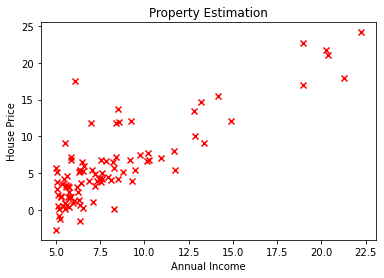

In [5]:
plt.scatter(X, y, marker='x', color='red')
plt.title("Property Estimation")
plt.xlabel('Annual Income')
plt.ylabel('House Price')

### Adding 1's to the first column of x in order to calculate the cost function

In [6]:
all_ones = np.ones((97,1))
X = np.expand_dims(X, axis = 1)

trainX = np.concatenate((all_ones, X), axis = 1)
trainY = np.expand_dims(y, axis = 1)
trainX.shape, trainY.shape

((97, 2), (97, 1))

In [7]:
trainX[:5], y[:5]

(array([[1.    , 6.1101],
        [1.    , 5.5277],
        [1.    , 8.5186],
        [1.    , 7.0032],
        [1.    , 5.8598]]),
 array([17.592 ,  9.1302, 13.662 , 11.854 ,  6.8233]))

## Calcualte Cost Function

In [8]:
def cost_function(X, y, theta):
    """
    X : train set features (97, 2) ; the first column must be all ones
    y : train set labels (97,1)
    theta: model parameters (2, 1)
    """ 
    m = X.shape[0]
    h = trainX.dot(theta) 
    cost = np.sum((h - y) ** 2) / (2 * m)
    return cost

In [9]:
theta = np.zeros((2,1))
cost_function(trainX, trainY, theta)

32.072733877455676

## Gradient Descent

In [10]:
iterations = 1500
alpha = 0.01

In [11]:
m = trainX.shape[0]
for i in range(iterations):
    h = trainX.dot(theta)
    temp0 = theta[0] - alpha  * np.sum(h - trainY) / m
    temp1 = theta[1] - alpha  * np.sum((h- trainY)*X) / m
    theta[0] = temp0
    theta[1] = temp1

In [12]:
theta

array([[-3.63029144],
       [ 1.16636235]])

In [13]:
cost_function(trainX, trainY, theta)

4.483388256587726

## Prediction

In [14]:
np.array([1, 7]).dot(theta)

array([4.53424501])

In [15]:
## Plot of Line that fits the data

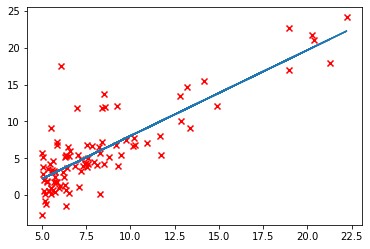

In [16]:
h = trainX.dot(theta)
plt.plot(X, h)
plt.scatter(X, y, marker = 'x', color="red")

## Visualization

In [17]:
theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-1, 4, 100)

J = np.zeros((len(theta0), len(theta1)))

for i in range(len(theta0)):
    for j in range(len(theta1)):
        t = [[theta0[i]], [theta1[j]]]
        J[i, j] = cost_function(trainX, trainY, t)

In [18]:
J

array([[328.09290555, 316.6648683 , 305.44447299, ..., 186.35412584,
        195.06735595, 203.98822799],
       [323.26504192, 311.92025945, 300.7831189 , ..., 189.60197489,
        198.39845977, 207.40258658],
       [318.47799046, 307.21646275, 296.16257698, ..., 192.89063611,
        201.77037576, 210.85775734],
       ...,
       [ 49.81156018,  46.45923561,  43.31455298, ..., 691.41691065,
        708.20585345, 725.20243817],
       [ 48.94247627,  45.67340647,  42.61197861, ..., 698.62353943,
        715.49573699, 732.57557648],
       [ 48.11420452,  44.9283895 ,  41.95021641, ..., 705.87098036,
        722.82643269, 739.98952696]])

<IPython.core.display.Javascript object>


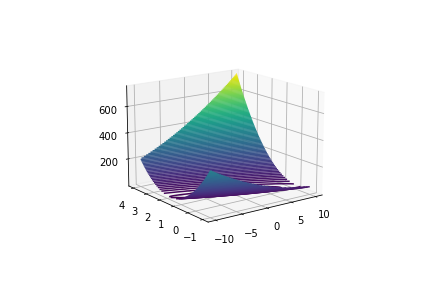

In [35]:
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(theta0, theta1, J.T, 100, cmap='viridis')
plt.show()

<IPython.core.display.Javascript object>


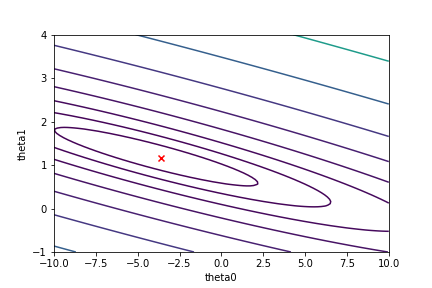

Text(0, 0.5, 'theta1')

In [22]:
fig, ax = plt.subplots()
ax.contour(theta0, theta1, J.T, np.logspace(-2, 3, 20))
ax.scatter(theta[0], theta[1], marker='x', color="red")
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')